<a href="https://colab.research.google.com/github/Ruhan-Saad-Dave/My-Projects/blob/main0/Schhol_attendance_report_DataScience_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction:

This is a mini data science project, which reads an attendance record of a school, and by giving the date it will predict the attendance percentage and number of students present by giving it the date and total number of students.

Resource: https://www.kaggle.com/datasets/sahirmaharajj/school-student-daily-attendance

#The programming part

This part contains the data preprocessing and model training part, it won't be understandable if you have very less knowledge for programming.

##Importing the libraries

We will be importing
* ``` Numpy ``` : For processing arrayed values
* ``` Pandas ``` : For reading the file and clean the data.
* ``` Scikit-learn ``` : For training the model.
* ``` Matplotlib ``` : For visualizing the data.
* ```Datetime``` : For doing processing with date values

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from datetime import datetime

##Importing the data set

In [ ]:
dataset = pd.read_csv('attendance.csv')

Showing the top 5 rows

In [ ]:
dataset.head()

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172.0,19.0,153.0,0.0
1,01M015,20180906,171.0,17.0,154.0,0.0
2,01M015,20180907,172.0,14.0,158.0,0.0
3,01M015,20180912,173.0,7.0,166.0,0.0
4,01M015,20180913,173.0,9.0,164.0,0.0


Showing the bottom 5 rows

In [ ]:
dataset.tail()

,School DBN,Date,Enrolled,Absent,Present,Released
72148,09X231,20181023,525.0,23.0,502.0,0.0
72149,09X231,20181024,524.0,19.0,505.0,0.0
72150,09X231,20181025,523.0,32.0,491.0,0.0
72151,09X231,20181026,522.0,29.0,493.0,0.0
72152,09X231,201810,NaN,NaN,NaN,NaN


Showing all the columns

In [ ]:
dataset.columns

Index(['School DBN', 'Date', 'Enrolled', 'Absent', 'Present', 'Released'], dtype='object')

Describing the dataset

In [ ]:
dataset.describe()

,Date,Enrolled,Absent,Present,Released
count,7.215300e+04,72152.000000,72152.000000,72152.000000,72152.000000
mean,2.018635e+07,477.502633,44.598625,431.047525,1.856484
...,...,...,...,...,...
75%,2.019041e+07,565.000000,56.000000,521.000000,0.000000
max,2.019063e+07,3333.000000,1589.000000,3297.000000,1415.000000


##Cleaning the data

Checking for missing values

In [ ]:
dataset.isnull().sum()

School DBN    0
Date          0
             ..
Present       1
Released      1
Length: 6, dtype: int64

Checking for exact location of the missing values, since only 1 is there.

In [ ]:
dataset.isnull()

,School DBN,Date,Enrolled,Absent,Present,Released
0,False,False,False,False,False,False
1,False,False,False,False,False,False
...,...,...,...,...,...,...
72151,False,False,False,False,False,False
72152,False,False,True,True,True,True


From the above result, it is clear that all the missing values is present in a single row. Since it is only 1 row, we can remove it as it wont effect much.

In [ ]:
dataset.dropna()

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172.0,19.0,153.0,0.0
1,01M015,20180906,171.0,17.0,154.0,0.0
...,...,...,...,...,...,...
72150,09X231,20181025,523.0,32.0,491.0,0.0
72151,09X231,20181026,522.0,29.0,493.0,0.0


Checking for wrong entered values. There are sometimes the values in a dataset will have a typo.

In [ ]:
dataset

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172.0,19.0,153.0,0.0
1,01M015,20180906,171.0,17.0,154.0,0.0
...,...,...,...,...,...,...
72151,09X231,20181026,522.0,29.0,493.0,0.0
72152,09X231,201810,NaN,NaN,NaN,NaN


It is found that some date values are incomplete (eg: 201810), so we need to remove those rows.

In [ ]:
dataset = dataset[pd.to_datetime(dataset['Date'], format='%Y%m%d', errors='coerce').notnull()]
dataset

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172.0,19.0,153.0,0.0
1,01M015,20180906,171.0,17.0,154.0,0.0
...,...,...,...,...,...,...
72150,09X231,20181025,523.0,32.0,491.0,0.0
72151,09X231,20181026,522.0,29.0,493.0,0.0


For training the machine learning model, we will need the columns ```Date```, ```Enrolled```, ```Present```. And also add on new columns ```Day_of_year```, ```Month```, ```Day_of_week```, ```Attendance_percentage```

In [ ]:
temporary_dataset = dataset[['Date', 'Enrolled', 'Present']].copy()
temporary_dataset['Date'] = pd.to_datetime(temporary_dataset['Date'], format='%Y%m%d')
temporary_dataset['Day_of_year'] = temporary_dataset['Date'].dt.year
temporary_dataset['Month'] = temporary_dataset['Date'].dt.month
temporary_dataset['Day_of_week'] = temporary_dataset['Date'].dt.day_name()
temporary_dataset['Attendance_percentage'] = (temporary_dataset['Present'] / temporary_dataset['Enrolled']) * 100

#Rearranging the columns for readablility
final_dataset = temporary_dataset[['Date','Day_of_year', 'Month', 'Day_of_week', 'Enrolled', 'Present', 'Attendance_percentage']].copy()

In [ ]:
final_dataset.head()

,Date,Day_of_year,Month,Day_of_week,Enrolled,Present,Attendance_percentage
0,2018-09-05,2018,9,Wednesday,172.0,153.0,88.953488
1,2018-09-06,2018,9,Thursday,171.0,154.0,90.058480
2,2018-09-07,2018,9,Friday,172.0,158.0,91.860465
3,2018-09-12,2018,9,Wednesday,173.0,166.0,95.953757
4,2018-09-13,2018,9,Thursday,173.0,164.0,94.797688


In [ ]:
final_dataset.tail()

,Date,Day_of_year,Month,Day_of_week,Enrolled,Present,Attendance_percentage
72147,2018-10-22,2018,10,Monday,526.0,499.0,94.866920
72148,2018-10-23,2018,10,Tuesday,525.0,502.0,95.619048
72149,2018-10-24,2018,10,Wednesday,524.0,505.0,96.374046
72150,2018-10-25,2018,10,Thursday,523.0,491.0,93.881453
72151,2018-10-26,2018,10,Friday,522.0,493.0,94.444444


##Visualizing the data

Since the data is now cleaned, its time to visualize the data in order to understand the relations between the data points

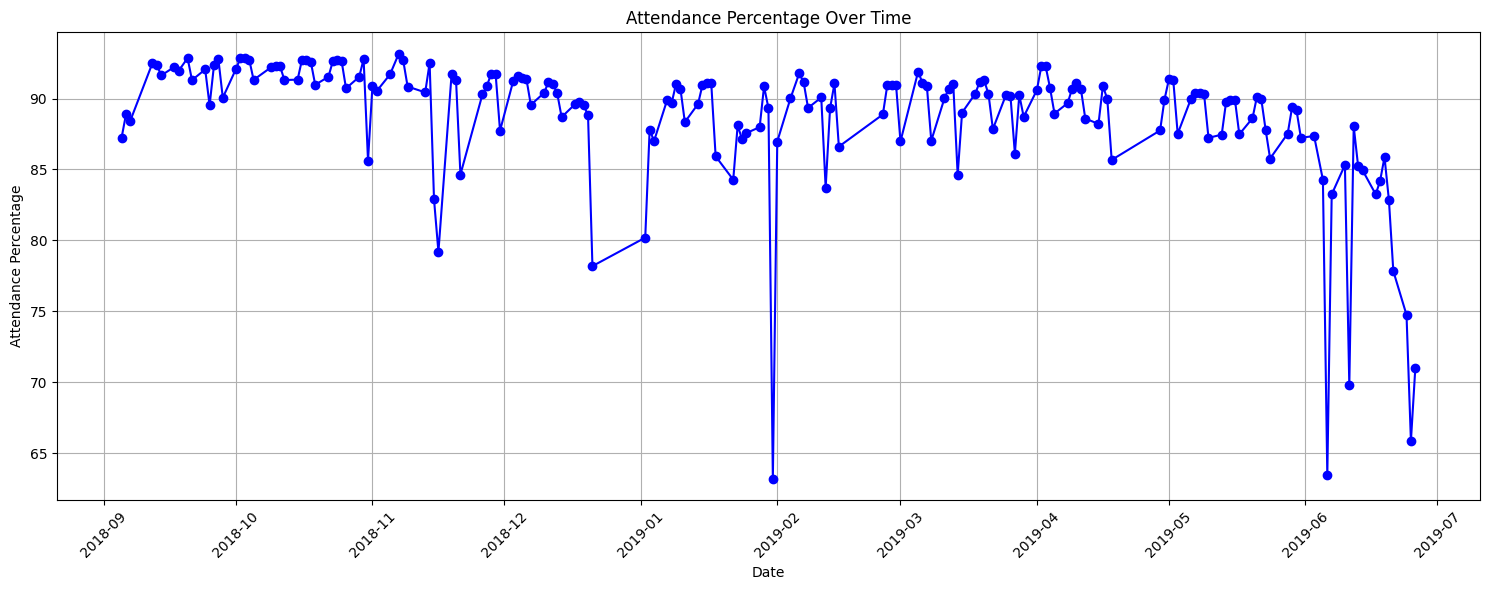

In [ ]:
#Attendance vs date
agg_dataset = final_dataset.groupby('Date')['Attendance_percentage'].mean().reset_index()
plt.figure(figsize=(15, 6))
plt.plot(agg_dataset['Date'], agg_dataset['Attendance_percentage'], marker='o', color='b', linestyle='-')
plt.title('Attendance Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Attendance Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

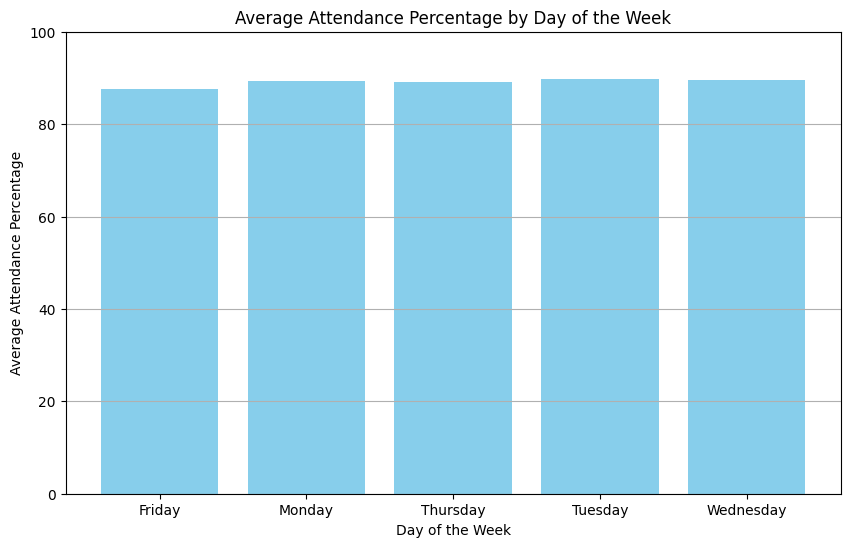

In [ ]:
#Attendance VS Day of the week
agg_dataset = final_dataset.groupby('Day_of_week')['Attendance_percentage'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(agg_dataset['Day_of_week'], agg_dataset['Attendance_percentage'], color='skyblue')
plt.title('Average Attendance Percentage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Attendance Percentage')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for percentage
plt.grid(axis='y')

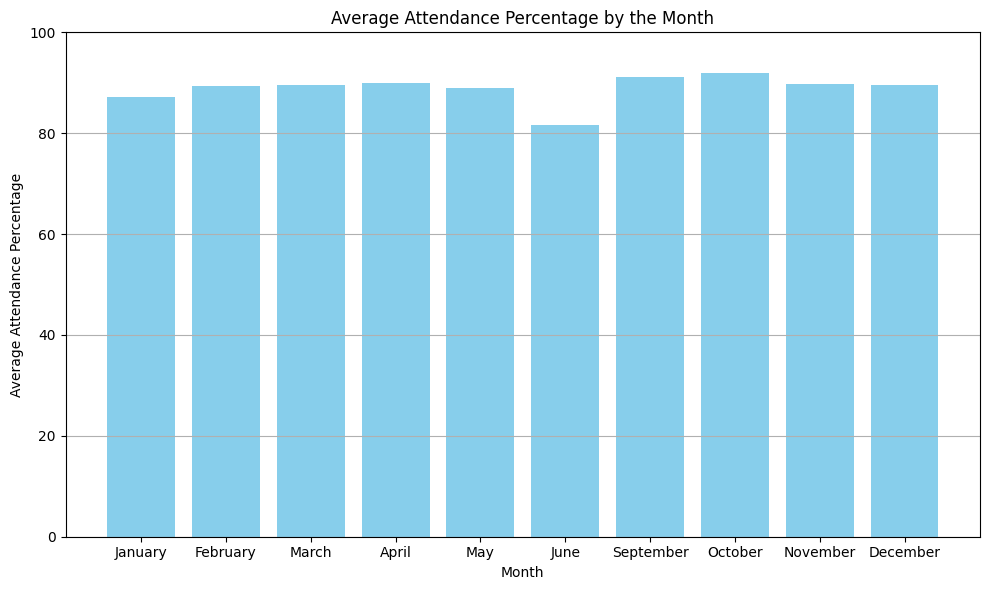

In [ ]:
#Attendance VS Month
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
agg_dataset = final_dataset.groupby('Month')['Attendance_percentage'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar([month_names[m] for m in agg_dataset['Month']], agg_dataset['Attendance_percentage'], color='skyblue')
plt.title('Average Attendance Percentage by the Month')
plt.xlabel('Month')
plt.ylabel('Average Attendance Percentage')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for percentage
plt.grid(axis='y')
plt.tight_layout()
plt.show()

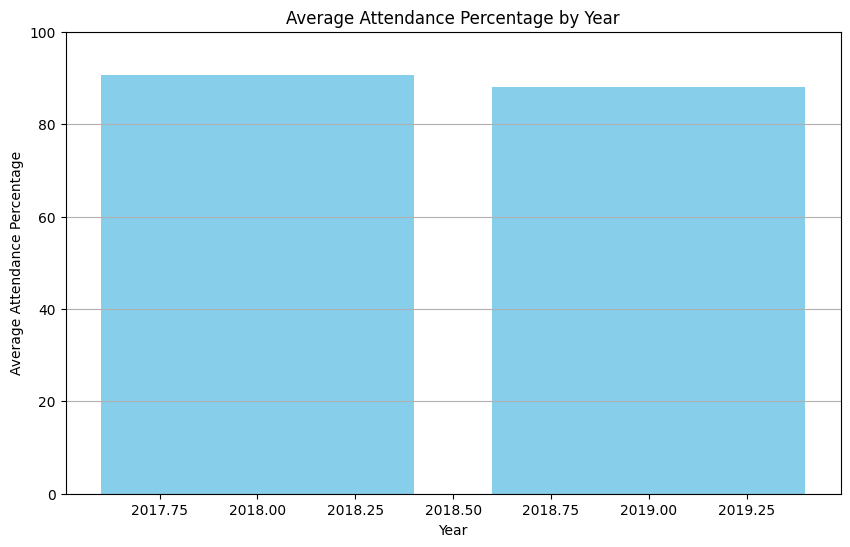

In [ ]:
#Attendance VS Year
agg_dataset = final_dataset.groupby('Day_of_year')['Attendance_percentage'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(agg_dataset['Day_of_year'], agg_dataset['Attendance_percentage'], color='skyblue')
plt.title('Average Attendance Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Average Attendance Percentage')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for percentage
plt.grid(axis='y')

##Extracting the feature and label

For the model to predict the attendance, we need to choose the columns used to predict the output, and the column set as output. In this case, we will be using ```Date``` and ```Day_of_the_week``` as features and ```Attendance_percentage``` as label

In [ ]:
X = final_dataset.iloc[:, 1:4].values
y = final_dataset.iloc[:, -1].values

We didn't take the ```Enrolled``` and ```Present``` columns as we only need to calculate the percentage. But it is included in the dataset in order to make the ```Attendance_percentage``` column.

##Encoding the data

Now since all the data has been cleaned and the required columns are used, its time to make the data fully ready to be used for a model. We will be encoding the ```Day_of_week``` column as it is a categorical column and need to be turned into a numerical type.

In [ ]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [2])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

##Splitting training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##Traing the machine learning model

We will be using Random Tree Regressor, as ```Day_of_the_year```, ```Month```, ```Day_of_week``` may have different weightage to be used for prediction. This model automatically calculates best way to calculate the result.

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

##Evaluating the model

It is important to evaluate the performance of the model in order to check if we need to change the algorithm or any other data. We will be using:
* Mean Absolute Error

In [ ]:
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Absolute Error (MAE): 6.36


From the model evaluation analysis, the model shows error of 6.3% which seems to be working finely. It could be improved more by using neural network or gradient boost.

#Predicting new data

Now its time to predict new data. The user need to put in the date and enrolled student, and the model will predict the attendance percentage and the no of students present.

In [ ]:
date = input("Enter the date to check (YYYY-MM-DD):  ")
enrolled = int(input("Enter the total number of students: "))

# Convert user input date to datetime format
input_date = datetime.strptime(date, '%Y-%m-%d')

# Extract year, month, and day of the week from the input date
input_year = input_date.year
input_month = input_date.month
input_day_of_week = input_date.strftime('%A')  # Get full day name (e.g., 'Monday')
if input_day_of_week in ['Saturday', 'Sunday']:
  print("No student came to school on this day, as it is ", input_day_of_week)
else:
  # Prepare input features for the model
  input_features = np.array([[input_year, input_month, input_day_of_week]])

  # Transform input features using the same ColumnTransformer object
  transformed_input_features = ct.transform(input_features)

  # Now, transformed_input_features contains the input features ready to be used by your model for prediction
  ans = regressor.predict(transformed_input_features)

  #Displaying value:
  print("Predicted Attendance Percentage:", ans[0], "%")
  print("Predicted Present number of student:", (enrolled * ans[0])//100)

Enter the date to check (YYYY-MM-DD):  2024-05-02


We can see that, given a date and total number of student, we can predict the attendance percentage and also the number of students present.

Also if the date given turns out to be saturday or sunday, the model will say that no student came to the school on that day.

#Conclusion

This mini-project is a data science project, which analyses the data, and predict the attendance percentage based on a date and total number of student. This project covers:
* Cleaning the data
  * Removing rows with empty values
  * Removing rows with wrongly entered values
* Data visulization
  * Attendance VS date
  * Attendance VS Day of the week
  * Attendance Vs Month
  * Attendance VS Year
* Splitting data into training and test sets
* Encoding the categorical values
* Trained the model
* Evaluated the model
* Predicted new values